<a href="https://colab.research.google.com/github/SupermarketAutomationAI/Primary_Shakiba/blob/main/Primary_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the Data - V1

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! unzip '/content/drive/My Drive/Dataset Zip Files/SupermarketAutomationAI_Dataset_V1' -d '/root/datasets'

Streaming output truncated to the last 5000 lines.
  inflating: /root/datasets/__MACOSX/SupermarketAutomationAI_Dataset_V1/Multiple Oranges/._Orange00784.png  
  inflating: /root/datasets/SupermarketAutomationAI_Dataset_V1/Multiple Oranges/._Orange00784.png  
  inflating: /root/datasets/SupermarketAutomationAI_Dataset_V1/Multiple Oranges/Orange00785.png  
  inflating: /root/datasets/__MACOSX/SupermarketAutomationAI_Dataset_V1/Multiple Oranges/._Orange00785.png  
  inflating: /root/datasets/SupermarketAutomationAI_Dataset_V1/Multiple Oranges/._Orange00785.png  
  inflating: /root/datasets/SupermarketAutomationAI_Dataset_V1/Multiple Oranges/Orange00786.png  
  inflating: /root/datasets/__MACOSX/SupermarketAutomationAI_Dataset_V1/Multiple Oranges/._Orange00786.png  
  inflating: /root/datasets/SupermarketAutomationAI_Dataset_V1/Multiple Oranges/._Orange00786.png  
  inflating: /root/datasets/SupermarketAutomationAI_Dataset_V1/Multiple Oranges/Orange00787.png  
  inflating: /root/datasets/

Split the data

In [ ]:
# Import the necessary libraries
import json
import os
import math
import shutil

In [ ]:
# create data directory and move all images into it
parent_dir = "/root/datasets/SupermarketAutomationAI_Dataset_V1"
os.chdir(parent_dir)
category_list = list(filter(lambda x: os.path.isdir(x), os.listdir()))
data_dir = parent_dir + '/' + "data"
os.mkdir(data_dir, 755)
for category in category_list:
    cat_dir = parent_dir + '/' + category
    shutil.move(cat_dir, data_dir)

In [ ]:
train_split = 0.6

dataset_dirs= ['train','val','test']
for dsdirs in dataset_dirs:
 path = parent_dir + '/'+ dsdirs
 os.mkdir( path,755 )

for category in category_list: 
    src_path = parent_dir + '/data/' + category
    train_dir = parent_dir + '/train/' + category + '/'
    val_dir = parent_dir + '/val/' + category + '/'
    test_dir = parent_dir + '/test/' + category + '/'
    
    os.mkdir(train_dir, 755 )
    os.mkdir(val_dir, 755)
    os.mkdir(test_dir, 755)

    #get files' names list from respective directories
    os.chdir(src_path)
    files = [f for f in os.listdir() if os.path.isfile(f)]

    #get training, testing and validation files count
    train_count = math.ceil(train_split*len(files))
    valid_count = int((len(files)-train_count)/2)
    test_count = valid_count

    #get files to segragate for train,test and validation data set
    train_data_list = files[0: train_count-1]
    valid_data_list = files[train_count:train_count+valid_count-1] 
    test_data_list = files[train_count+valid_count:]


    for train_data in train_data_list:
        train_path = src_path + '/' + train_data
        shutil.move(train_path,train_dir)

    for valid_data in valid_data_list:
        valid_path = src_path + '/' + valid_data
        shutil.move(valid_path,val_dir)

    for test_data in test_data_list:
        test_path = src_path + '/' + test_data
        shutil.move(test_path,test_dir)

    # Move any files that are left behind into the training directory
    os.chdir(src_path)
    files = [f for f in os.listdir() if os.path.isfile(f)]
    for img_left_behind in files:
        img_path = src_path + '/' + img_left_behind
        shutil.move(img_path, train_dir)
    
    # TODO: Print number of files in directory, and compute the actual split porportions
    os.chdir(src_path)
    files = [f for f in os.listdir() if os.path.isfile(f)]
    src_files = len(files)
    print("SRC - {} : {} files".format(category, src_files))
    os.chdir(train_dir)
    files = [f for f in os.listdir() if os.path.isfile(f)]
    train_files = len(files)
    print("TRAIN - {} : {} files".format(category, train_files))
    os.chdir(val_dir)
    files = [f for f in os.listdir() if os.path.isfile(f)]
    val_files = len(files)
    print("VAL - {} : {} files".format(category, val_files))
    os.chdir(test_dir)
    files = [f for f in os.listdir() if os.path.isfile(f)]
    test_files = len(files)
    print("TEST - {} : {} files".format(category, test_files))

    total_files = train_files + val_files + test_files
    print("Split: {}% training, {}% validation, and {}% test".format((train_files/total_files * 100), (val_files/total_files * 100), (test_files/total_files * 100)))

SRC - One Orange : 0 files
TRAIN - One Orange : 653 files
VAL - One Orange : 216 files
TEST - One Orange : 217 files
Split: 60.12891344383057% training, 19.88950276243094% validation, and 19.981583793738487% test
SRC - Multiple Fuji Apples : 0 files
TRAIN - Multiple Fuji Apples : 331 files
VAL - Multiple Fuji Apples : 109 files
TEST - Multiple Fuji Apples : 110 files
Split: 60.18181818181818% training, 19.818181818181817% validation, and 20.0% test
SRC - One Granny Smith Apple : 0 files
TRAIN - One Granny Smith Apple : 244 files
VAL - One Granny Smith Apple : 79 files
TEST - One Granny Smith Apple : 81 files
Split: 60.396039603960396% training, 19.554455445544555% validation, and 20.049504950495052% test
SRC - One Fuji Apple : 0 files
TRAIN - One Fuji Apple : 502 files
VAL - One Fuji Apple : 165 files
TEST - One Fuji Apple : 167 files
Split: 60.19184652278178% training, 19.784172661870503% validation, and 20.023980815347723% test
SRC - One Red Delicious Apple : 0 files
TRAIN - One Red 

In [ ]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


In [ ]:
dataset_dirs= ['train','val','test']
for dsdirs in dataset_dirs:
  path = parent_dir + '/'+ dsdirs
  !find $path -name '._*' -delete
  print("Deleted ._* files from {0}".format(path))

Deleted ._* files from /root/datasets/SupermarketAutomationAI_Dataset_V1/train
Deleted ._* files from /root/datasets/SupermarketAutomationAI_Dataset_V1/val
Deleted ._* files from /root/datasets/SupermarketAutomationAI_Dataset_V1/test


In [ ]:
from torchvision import transforms, datasets
import torch
import torch.nn as nn
# set the batch_size
batch_size = 1
parent_dir = "/root/datasets/SupermarketAutomationAI_Dataset_V1"
# define the locations of the training and validation data
train_dir = os.path.join(parent_dir, 'train/')
val_dir = os.path.join(parent_dir, 'val/')
test_dir = os.path.join(parent_dir, 'test/')

# define a list of all classes that the model will be trained with
classes = ['Multiple Bananas', 'Multiple Fuji Apples', 'Multiple Gala Apples', 'Multiple Golden Delicious Apples', 
           'Multiple Granny Smith Apples', 'Multiple Oranges', 'Multiple Red Delicious Apples',
           'One Banana', 'One Fuji Apple', 'One Gala Apple', 'One Golden Delicious Apple',
           'One Granny Smith Apple', 'One Orange', 'One Red Delicious Apple']

# three possible transforms, will test each to see which gives better results
data_CC_transform = transforms.Compose([transforms.CenterCrop([224,224]), transforms.ToTensor()])

# apply the transforms to the data
train_data = datasets.ImageFolder(train_dir, transform=data_CC_transform)
val_data = datasets.ImageFolder(val_dir, transform=data_CC_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_CC_transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

In [ ]:
#Artifical Neural Network

torch.manual_seed(1) # set the random seed

class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.name = "ann"
        self.fc1 = nn.Linear(256 * 6 * 6, 4096)
        self.fc2 = nn.Linear(4096, 500)
        self.fc3 = nn.Linear(500, 50)
        self.fc4 = nn.Linear(50, 14)

    def forward(self, x):
        x = x.view(-1, 256 * 6 * 6) #flatten feature data
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [ ]:
parent_dir = "/root/datasets/SupermarketAutomationAI_V1_Features"
def ANNFeatures(loader, ds_type):
  # save features to folder as tensors
  n = 0
  for img, label in loader:
    features = alexnet.features(img)
    features_tensor = torch.from_numpy(features.detach().numpy())

    folder_name = parent_dir + '/' + ds_type + '/' + str(classes[label])
    print(folder_name)
    if not os.path.isdir(folder_name):
      os.mkdir(folder_name)
    torch.save(features_tensor.squeeze(0), folder_name + '/' + str(n) + '.tensor')
    n += 1

In [ ]:
parent_dir = "/root/datasets/SupermarketAutomationAI_V1_Features"
if not os.path.isdir(parent_dir):
    os.mkdir(parent_dir)

train_dir = "/root/datasets/SupermarketAutomationAI_V1_Features/train"
if not os.path.isdir(train_dir):
    os.mkdir(train_dir)

val_dir = "/root/datasets/SupermarketAutomationAI_V1_Features/val"
if not os.path.isdir(val_dir):
    os.mkdir(val_dir)

test_dir = "/root/datasets/SupermarketAutomationAI_V1_Features/test"
if not os.path.isdir(test_dir):
    os.mkdir(test_dir)

# setting batch size to be 1 to load images one by one
batch_size = 1
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

In [ ]:
ANNFeatures(train_loader, 'train')
ANNFeatures(val_loader, 'val')
ANNFeatures(test_loader, 'test')

In [24]:
import time
import matplotlib.pyplot as plt 
import torch.optim as optim 
import torch.nn.functional as F
def train(model, train_loader, val_loader, batch_size=128, num_epochs=64, learn_rate = 0.001):

    torch.manual_seed(1000)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learn_rate)
    
    train_acc, val_acc, epochs, list_loss = [], [], [], []

    # training
    print ("Training Started...")
    n = 0 # the number of iterations
    epoch_num = 0
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
          

            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
            n += 1
        
        # track the accuracy
        epoch_num += 1
        epochs.append(epoch_num)
        average_loss = (float(loss))/batch_size
        list_loss.append(average_loss)   
        train_acc.append(get_accuracy(model, train_loader))
        val_acc.append(get_accuracy(model, val_loader))
    #checkpointing
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(model.name,batch_size,learn_rate,
                                                   epoch)
    torch.save(model.state_dict(), path)
    #plots
    plt.title("Learning Curve")
    plt.plot(epochs, list_loss, label="Train")
    
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

    plt.title("Learning Curve")
    plt.plot(epochs, train_acc, label="Train")
    plt.plot(epochs, val_acc, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()
    print("Final training accuracy: {}".format(train_acc[-1]))
    print("Final validation accuracy: {}".format(val_acc[-1]))
    

In [21]:
def get_accuracy(model, data_loader):
    correct = 0
    total = 0
    if (len(data_loader)==0):
      return
    for imgs, labels in data_loader:

        output = model(imgs)
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [16]:
train_path = '/root/datasets/SupermarketAutomationAI_V1_Features/train'
train_features = torchvision.datasets.DatasetFolder(train_path, loader=torch.load, extensions=('.tensor'))

val_path = '/root/datasets/SupermarketAutomationAI_V1_Features/val'
val_features = torchvision.datasets.DatasetFolder(val_path, loader=torch.load, extensions=('.tensor'))

test_path = '/root/datasets/SupermarketAutomationAI_V1_Features/test'
test_features = torchvision.datasets.DatasetFolder(test_path, loader=torch.load, extensions=('.tensor'))

# Prepare Dataloader
batch_size = 64
num_workers = 1
train_feature_loader = torch.utils.data.DataLoader(train_features, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

val_features_loader = torch.utils.data.DataLoader(val_features, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

test_features_loader = torch.utils.data.DataLoader(test_features, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

# Verification Step - obtain one batch of features
dataiter = iter(train_feature_loader)
features, labels = dataiter.next()
print(features.shape)
print(labels.shape)

torch.Size([64, 256, 6, 6])
torch.Size([64])


Training Started...


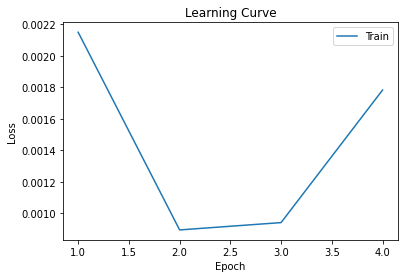

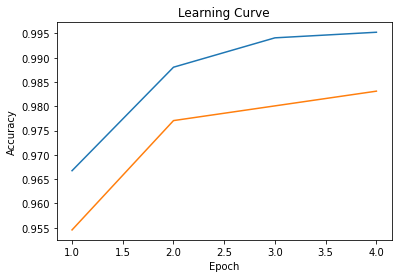

Final training accuracy: 0.9952483801295896
Final validation accuracy: 0.9831168831168832


In [26]:
few_epochs = ANN()

train(few_epochs, train_feature_loader, val_features_loader, num_epochs=4, learn_rate=0.0001, batch_size=64)

Training Started...


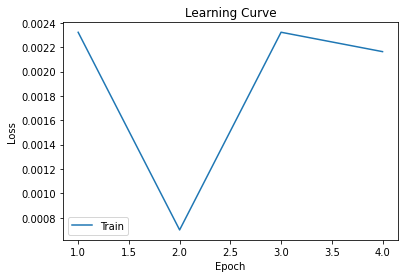

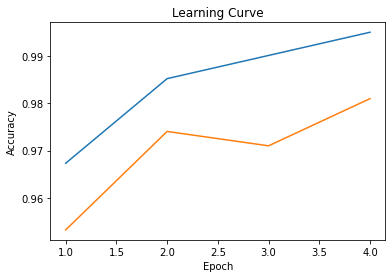

Final training accuracy: 0.9949604031677466
Final validation accuracy: 0.9809523809523809


In [27]:
torch.manual_seed(1)
few_epochs_ = ANN()

train(few_epochs_, train_feature_loader, val_features_loader, num_epochs=4, learn_rate=0.0001, batch_size=64)